In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

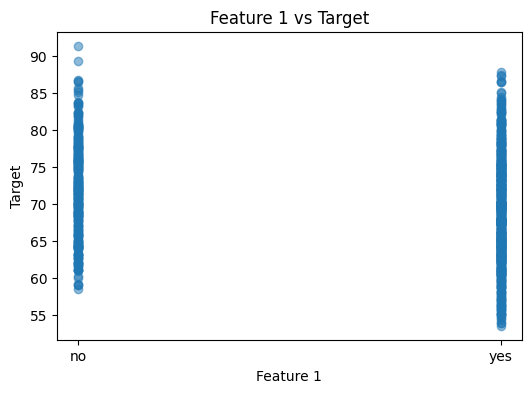

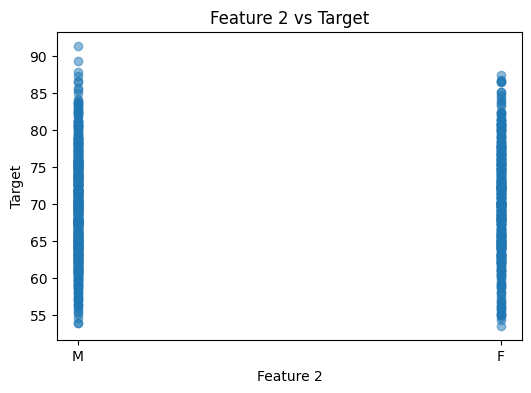

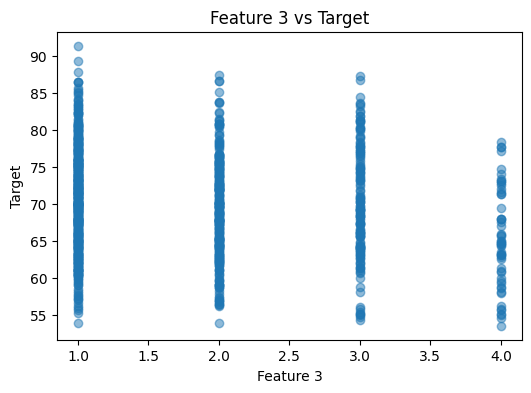

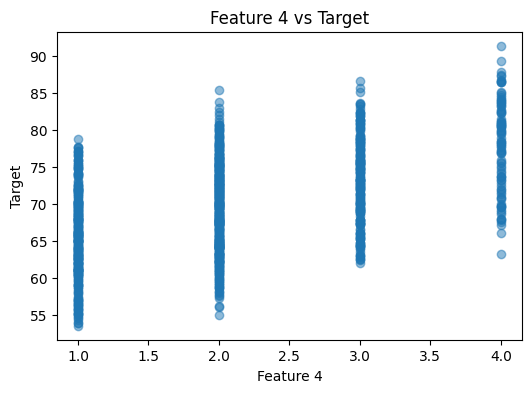

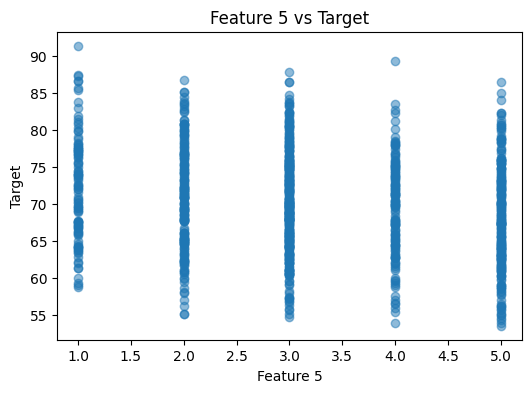

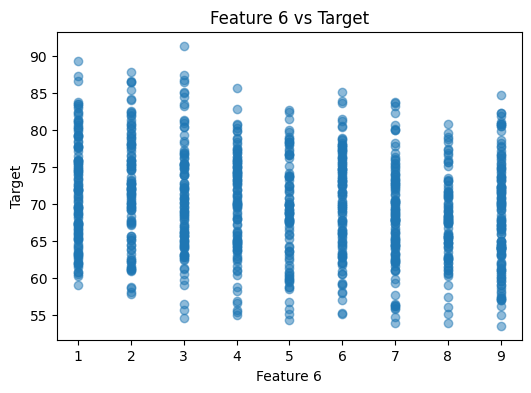

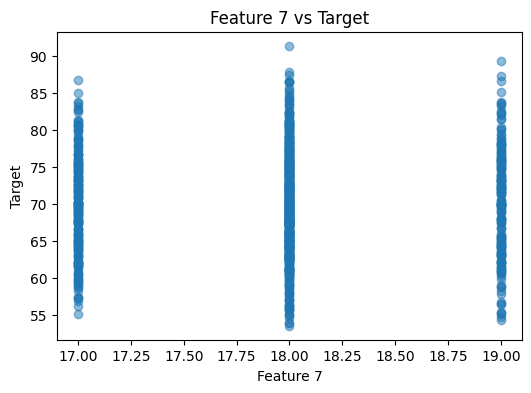

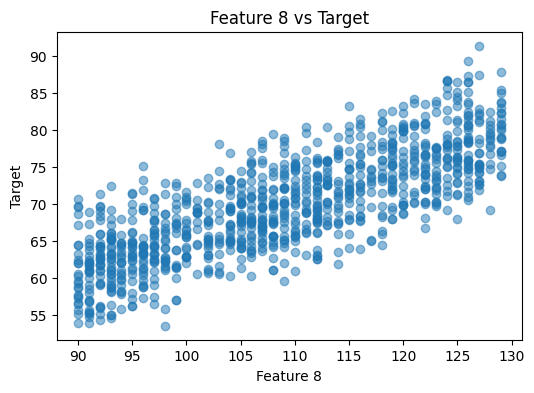

In [8]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
for i in range(x_train.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:, i], y_train, alpha=0.5)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Feature {i+1} vs Target')
    plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
  # ---------
    # Convert to DataFrame to handle categorical features
  x_train_df = pd.DataFrame(x_train)

    # Example of label encoding for categorical features
  le = LabelEncoder()
  for col in x_train_df.select_dtypes(include=['object']).columns:
      x_train_df[col] = le.fit_transform(x_train_df[col])

    # Example: Adding a new feature (e.g., the square of the first feature)
  x_train_df['New_Feature'] = x_train_df[0] ** 2

    # Convert back to numpy array
  x_train = x_train_df.values
  return x_train

x_train = feature_changing(x_train)

In [9]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)

  x_train_normalized = (x_train - x_mean) / x_std

  return x_train_normalized, x_std, x_mean


In [10]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
  m = len(y_train)  # Number of training examples

    # Calculate predictions
  y_pred = np.dot(x_train, w) + b

    # Calculate mean squared error (MSE)
  mse = np.mean((y_pred - y_train) ** 2)

  return mse

In [21]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
  m = len(y_train)  # Number of training examples
  learning_rate=0.02
  num_iterations=10000

  for i in range(num_iterations):

        # Compute predictions
    y_pred = np.dot(x_train, w) + b

        # Compute gradients
    dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
    db = (1/m) * np.sum(y_pred - y_train)

        # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db

  return w, b

In [22]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 2.0%
